<a href="https://colab.research.google.com/github/Ken-huea/Language-processing/blob/main/%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0_mnist_Good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### mnistにつて。

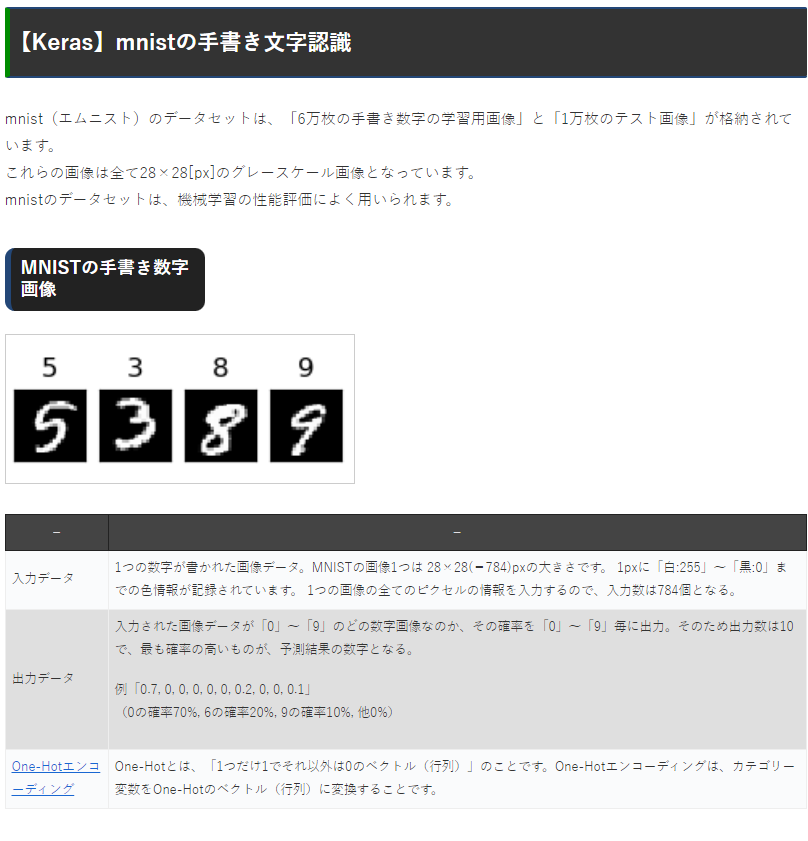

今回の作成物の目標
- 私たちが0～9の数字が書かれた画像を提出する。　モデル(AI)が読み込み判断し、予測を返す。

このような仕組みを作成しようと思います。

## 実装　
⇒一般的なディープラーニング。こちらを参照致しました。

[概要はこちら](https://www.youtube.com/watch?v=L3qf-jMj_fI&list=PL1P-NJggk9lbilEP-IHapQRCdYlvX43yC&index=105&t=1124s)
　
[こちらも取り込んだ](https://www.youtube.com/watch?v=ZAWvHvOBGDU&list=PL1P-NJggk9lbilEP-IHapQRCdYlvX43yC&index=105)

### 準備
モジュールインポート、データの取得

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
import pickle

入力画像のパラメータ 画像サイズの入力。　画像サイズを統一します。

今回作成するモデルは28*28の画像に対応するようにします。　つまり、与えられた画像をこのスケールに変換する。」という事です。


In [2]:
img_width = 28  # 入力画像の幅
img_height = 28 # 入力画像の高さ

# 入力データ数（今回は28*28=784個）
num_input = int(img_width * img_height)

# 分類クラス数(今回は0～9の手書き文字なので10)10パターン
num_classes = 10       

### データの取得と整形

①データ取得と分割

データはmnistから取得します。取得時にデータ分割も同時にしておきましょう。　この分割方法はこのようなものと考えて頂ければ。

そして分割されたデータのshape確認はクセで行う事をお勧めします。shapeが合ってないエラーは多発しますので。

In [3]:
# mnistデータセット（訓練用データと検証用データ）をネットから取得。そして訓練用とテスト用に分割。
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape,x_test.shape, y_test.shape
print("訓練データの画像データ",x_train.shape) # 28*28pxの60000枚。
print("訓練データの正解ラベル",y_train.shape) # 60000枚で１～９
print("テストデータの画像データ",x_test.shape) # 28*28pxの10000枚。
print("テストデータの正解ラベル",y_test.shape) # 10000枚で１～９

11501568/11490434 [==============================] - 0s 0us/step
訓練データの画像データ (60000, 28, 28)
訓練データの正解ラベル (60000,)
テストデータの画像データ (10000, 28, 28)
テストデータの正解ラベル (10000,)


- ②　取得したデータを、2次元配列から1次元配列へ変換（今回は28*28=784個の要素数)：

28＊28のピクセルをreshapeに784の数字の羅列に変換しました。こっちの方が処理しやすいので。

- ③　そのデータ型をfloat32(浮動小数点型)に変換

これらの処理はディープラーニングに組み込む上での必要な処理です。

In [4]:
# 2次元配列から1次元配列へ変換
x_train = x_train.reshape(60000, num_input)
x_test = x_test.reshape(10000, num_input)


# データ型をfloat32(浮動小数点型)に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
# 処理後の結果が気になる方は実行して確認してみてください。
print(x_train[0].shape)
x_train[0]

(784,)

④　正規化(0-255から0.0-1.0に変換）

これも同様でディープラーニングに必要な処理。　今回は全てのデータに255を割っていますね。(正規化の方法は色々あります。)

In [8]:
x_train /= 255
x_test /= 255

In [ ]:
# 処理後の結果が気になる方は実行して確認してみてください。 今回は全ての数字を0～１の範囲で抑えています。
x_train[0]

⑤ one hot encording

ディープラーニングにおいての鉄則ですね。答えのラベルをカテゴリカル変数、one hot encording致します。

説明では分かりにくいですが、見ればわかるはずです。

そしてその処理はkerasのモジュールを用いれば簡単。<font color="red">**第一引数にデータ、第二引数に分類する数。**(今回は10。)</font>

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# このように0から１～９までのカラムが生成されて、該当の正解ラベルに１、他は0になります。３ならば[0., 0., 3., ..., 0., 0., 0.] となります。
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
# データセットの個数を表示 ⇒只の確認。
print(x_train.shape[0], 'train samples')  # 60000枚の画像データ(1次元配列済み)
print(x_test.shape[0], 'test samples')    # 60000枚の画像データ(1次元配列済み)
print(x_test[0].shape)                    # 1次元配列になっていますね。

60000 train samples
10000 test samples
(784,)


### モデルの構築
今回は<font color="red">ディープラーニング)</font>のモデルを設定

ニューロンを作成して、場合によってはドロップアウトも追加します。

ドロップアウト：dropout_rate=0.2なら20%のユニットを無効化し、<font color="red">過学習防止。 
</font>

In [12]:
# ハイパーパラメータの調整 ⇒適宜調整。

num_middle_unit = 512  # 中間層のユニット数
dropout_rate = 0.2     # 過学習防止用：入力の20%を0にする（破棄）

In [13]:
# モデルの構築
model = Sequential()

①②は1行で一緒みたい。

①層目の入力層:28×28=784個のユニット数(個数は変数num_inputに格納)

②層目の中間層:ユニット数512(変数num_middle_unitに格納)、
その値は自分で適宜調整し精度向上を目指す。

活性化関数は<font color="red">relu関数</font>

In [14]:
print(num_input)
print(num_middle_unit)

784
512


変数を用いる事で変更/調整を容易にしていますね。単純な構造では返って分かりにくいかもだけど、このような構築方法もアリという事か。

In [15]:
#①②とドロップアウト
model.add(Dense(activation='relu', input_dim=num_input, units=num_middle_unit))

model.add(Dropout(dropout_rate))

③層目の中間層:ユニット数512、活性化関数はrelu関数

In [16]:
#③ とドロップアウト
model.add(Dense(units=num_middle_unit, activation='relu'))

model.add(Dropout(dropout_rate))

4層目、<font color="red">出力層</font>:10分類（0から9まで）なので、ユニット数10, 分類問題なので<font color="red">活性化関数はsoftmax関数</font>⇒それが定石。

In [17]:
model.add(Dense(num_classes, activation='softmax')) # 活性化関数：softmax
#状態を確認
model.summary()
# model summaryでモデル構築を確認。全部512でいいのかな？

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


数値の根拠は色々あるみたいですが、今回は教材通りに行います。是非試行錯誤をしてみましょう。

### 学習

コンパイルはどう学習するかを指定しています。
- 'categorical_crossentropy':分類問題ならこれを選びましょう。
- RMSprop: これは精度により推敲してみてください。
- accuracy: 正確度です。分類問題ではメジャーな評価指標の一つです。

In [18]:
# コンパイル（多クラス分類問題）
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [19]:
batch_size = 128       # バッチサイズ
epochs = 20            # エポック数(学習の繰り返し回数)
dropout_rate = 0.2     # 過学習防止用：入力の20%を0にする（破棄）

<font color="red">バッチサイズ</font>は機械学習分野の慣習として、「2のn乗」（32, 64, 128, 256, 512）が使われることが多い。

512はせっかちさんかな？って思っちゃうよ。

<font color="red">verbose</font> : これはログを出すかどうか。

そして学習で一番大事なことは<font color="red">過学習をしない事</font>。

その為にトレインデータだけでなく、val_dataも加味して学習させることが大事。

こちらはvalidationを取り入れた学習。

学習データ:trainのうち、10％を検証データ:validationとして使用 ⇒ 
`validation_split=0.1`



In [20]:
# 構築したモデルで学習
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.1
                    )

Epoch 1/20
422/422 [==============================] - 9s 19ms/step - loss: 0.2621 - accuracy: 0.9199 - val_loss: 0.0944 - val_accuracy: 0.9733
Epoch 2/20
422/422 [==============================] - 8s 19ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.0745 - val_accuracy: 0.9763
Epoch 3/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0786 - accuracy: 0.9759 - val_loss: 0.0803 - val_accuracy: 0.9785
Epoch 4/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0719 - val_accuracy: 0.9803
Epoch 5/20
422/422 [==============================] - 13s 31ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0749 - val_accuracy: 0.9815
Epoch 6/20
422/422 [==============================] - 12s 28ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0682 - val_accuracy: 0.9842
Epoch 7/20
422/422 [==============================] - 11s 26ms/step - loss: 0.0383 - accuracy: 0.9890 - val_loss: 0.0739 - val_accuracy: 0.9

観るべきところはaccuracyとval_accuracy。どちらも高い数字ですね。
今のところ、過学習はしていないだろうと考えられる。

例えばaccuracyが凄く高く、val_accuracyが低いと、<font color="red">過学習</font>していますよね。　訓練した所しかできてなくて未知のデータに弱いという事なのだから。

学習結果を可視化してみましょう。

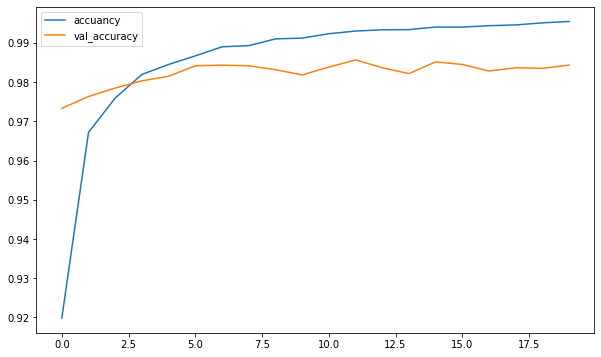

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
# 学習過程のプロット
# plt.plot(history.epoch, history.history["loss"], label="loss")                 # lossは今回見なくて良いかなと。
# plt.plot(history.epoch, history.history["val_loss"], label="val_loss")         # lossは今回見なくて良いかなと。

plt.plot(history.epoch, history.history["accuracy"], label="accuancy")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")

plt.legend()

### 精度評価

In [23]:
# テストデータを用いた最終的、パフォーマンス計測
score = model.evaluate(x_test, 
                            y_test,
                            verbose=0
                            )
 
print("testデータでのloss：",score[0]) # lossの表示。
print("testデータでのaccuracy：",score[1]) # accuracyの表示。

testデータでのloss： 0.13635851442813873
testデータでのaccuracy： 0.9814000129699707


今回はかなり良いモデルが出来たんじゃないでしょうか。

#### これ上のコードと同じじゃない？

In [ ]:
# 一つしか予測できてないじゃん。」
pred = model.predict(x_test)
pred

(10000, 10)

In [ ]:
pred_list = []

for i in pred:
  pred_list.append(np.argmax(i))
pred_list

In [ ]:
print(y_test.shape)
y_test[0]          # カテゴリカル変数を元に戻さないと。

(10000, 10)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_list, y_test)

ValueError: ignored

## 最後に確認
実際に未知のデータを与えて正しく分類分けできるか確かめてみましょう。

そして画像をモデルに読込むにはある程度の処理が必要ですよね。


①shapeを合わせる。（大きさの調整、色等）

②型(float)に調整

③1次元配列に変換

In [38]:
# 画像読込

import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/img_9.jpg",cv2.IMREAD_GRAYSCALE)
#　この際に第二引数にて｢白黒｣で読み込む。という処理を致しております。

# これで表示。
cv2_imshow(img)

#google colab以外
# cv2.imshow("画像タイトル名前つけ", 変数名)

<font color="red">**ポイント**</font>

今回モデルに学習させたデータは`(28, 28)`の画像ですよね。

そして私が読み込んだのは`(28, 28, 3)`。　⇒shapeが異なっています。この<font color="red">3</font>は何？って話。
　これは色の**RGB**です。

この要素があるからモデルに拒絶(エラー)されたのです。
`ValueError: cannot reshape array of size 2352 into shape (1,784)`

<font color="red">2352</font> これは1次元配列した値`28*28*3=2352` 　そこから<font color="red">俺が読み込んだ画像colorじゃね？</font>と気づくことが出来ました。

だから画像を読み込む時に<font color="red">白黒で読み込んでください</font>という指示をしたわけですよ。⇒　これでちゃんとモデルに適合して予測を算出できます。という事。

In [32]:
img.shape 
# 28 *28* 3 = 2352

(28, 28)

今回は独自関数を作成しました。これに合わせて説明致します。

In [40]:
def predicter(img):
  img = cv2.resize(img, (28, 28))       # 訓練データと同じサイズに整形
  img = img.astype('float32')           # float32に変換正規化
  img = np.array(img)/255               # 1～255正規化
  img = img.reshape(1, num_input)       # 一次元配列に変換
  predict_y = model.predict(img)        # 分類機に入力データを与えて予測（出力：各クラスの予想確率）
  predict_number = np.argmax(predict_y) # 最も確率の高い要素番号（=予想する数字）
  return "この画像の番号は:", predict_number 

In [41]:
predicter(img)

('この画像の番号は:', 3)

こうすればかなりイメージが湧くのではないでしょうか？
確率的に一番高いものを返している。という事です。

In [ ]:
img = cv2.resize(img, (28, 28))       
img = img.astype('float32')         
img = np.array(img)/255               
img = img.reshape(1, num_input)       
predict_y = model.predict(img)        

In [44]:
predict_y

array([[0.0000000e+00, 3.0450313e-28, 2.4421430e-22, 1.0000000e+00,
        5.2796795e-35, 6.4711155e-21, 0.0000000e+00, 4.2266945e-25,
        6.2572861e-25, 8.8468763e-24]], dtype=float32)